<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Ejer1-2_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

### Lectura de datos


In [3]:
# Load data
df = pd.read_csv('https://drive.google.com/uc?id=1XiPaHHEQRZ5rGwtTalpfDRxpxRS7vgWW',names=['HorasEstudio','Aprueba'])

print(df)

   HorasEstudio  Aprueba
0             2        0
1             3        0
2             4        0
3             5        0
4             6        1
5             7        1
6             8        1
7             9        1
8            10        1


### Compute the Cost Function $J(\theta)$ and Gradient

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [27]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [28]:
def hypotesis(x,theta):
    z = np.dot(x, theta)
    h = sigmoid(z)
    return h

### Gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [35]:
rows = df.shape[0]
cols = df.shape[1]
scores = df[['HorasEstudio']].values
results = df['Aprueba'].values

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)
theta = np.zeros((cols , 1))
print(X.shape)
print(y.shape)
print(theta.shape)

(9, 2)
(9, 1)
(2, 1)


In [36]:
def gradiente(x,y,theta,alfa,iteraciones,epsilon):
  import  math
  m=len(y)
  J_vals = []
  prev = math.inf
  for i in range(num_iter):
      h = hypotesis(X, theta)
      cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
      J_vals.append(cost)
      if(abs( J_vals[i]- prev) < epsilon) :
             print("Convergencia Alcanzada !", i ," iteraciones")
             break
      prev = J_vals[i]
      gradient = np.dot(X.T, (h - y)) / m
      theta -= alpha * gradient
    #if i % 20000 == 0:
    #   print('iteracion ',i,'coste ', cost)

  print('Adjusted coefficient: {}'.format(theta))
  print("cost: {}".format(J_vals[i]))
  return theta, J_vals

In [37]:
alpha=0.001
iteraciones = 1000000
epsilon = 1e-7
theta, costs = gradiente(X, y, theta, alpha, iteraciones,epsilon)

Convergencia Alcanzada ! 403253  iteraciones
Adjusted coefficient: [[-10.24075172]
 [  1.89255879]]
cost: 0.08861428522911761


### Plotting the Convergence of $J(\theta)$

Plot $J(\theta)$ against the number of iterations of gradient descent:

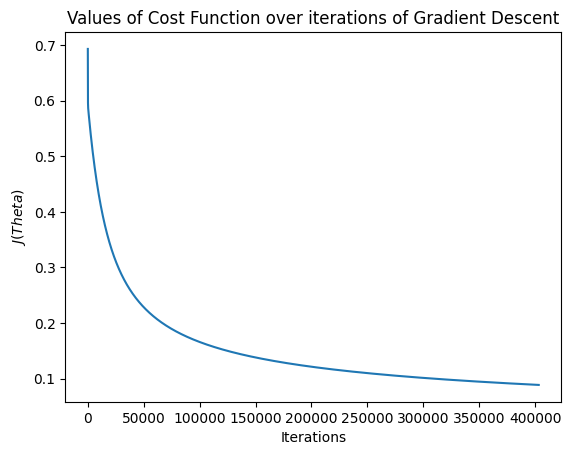

In [39]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Regresión Lineal



[0.16666667]
-0.4444444444444444
R Squared :  0.7499999999999999
Mean Absolute Error:  0.20987654320987661
Root Mean Squared Error:  0.24845199749997668


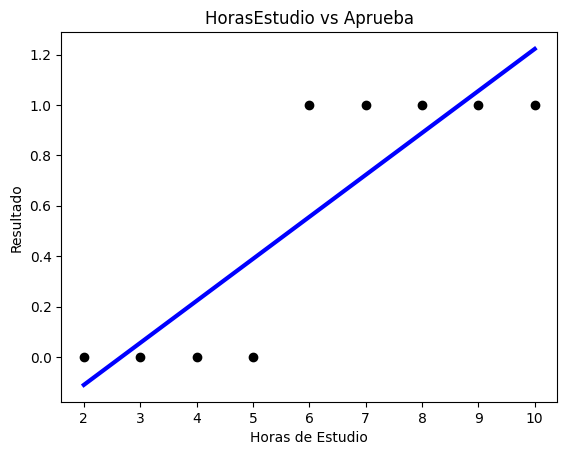

In [3]:
x= df.HorasEstudio.values[:, np.newaxis] # independent variable
y= df.Aprueba                      # dependent variable

# Create linear regression object
lr = lm.LinearRegression()

# Train the model using the training sets
lr.fit(x, y)

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('HorasEstudio vs Aprueba')
plt.ylabel('Resultado')
plt.xlabel('Horas de Estudio')

# add predict value to the data frame
df['Aprueba_Pred'] = lr.predict(x)
print(lr.coef_)
print(lr.intercept_)

# Using built-in function
print ("R Squared : ", r2_score(df.Aprueba, df.Aprueba_Pred))
print ("Mean Absolute Error: ", mean_absolute_error(df.Aprueba, df.Aprueba_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Aprueba, df.Aprueba_Pred)))

### Regresión LOgística



Utilizaremos el modelo con la función  logit o sigmoide:

log(p / p(1 - p)) = mx + c

p = 1 / 1 + e^-(mx + c)

coef [[2.67570118]]
intercept [-14.71626805]
[8.56748381e-05 1.24277552e-03 1.77499475e-02 2.07878309e-01
 7.92150806e-01 9.82253135e-01 9.98757444e-01 9.99914340e-01
 9.99994101e-01]
[0 0 0 0 1 1 1 1 1]


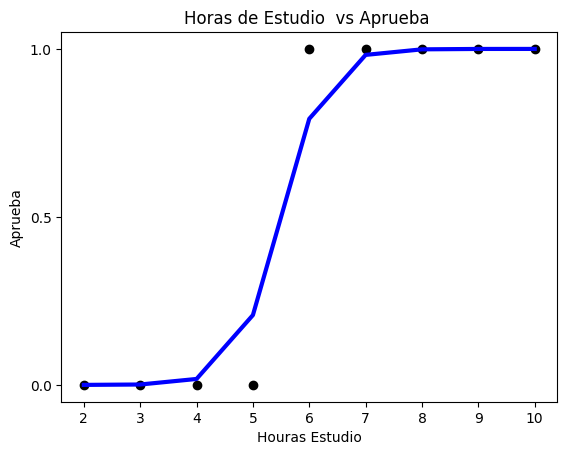

In [ ]:
from sklearn.linear_model import LogisticRegression

# manually add intercept
df['intercept'] = 1
#independent_variables = ['HorasEstudio', 'intercept']
independent_variables = ['HorasEstudio']

x = df[independent_variables]       # independent variable
y = df['Aprueba']                      # dependent variable

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(C=10)
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

print("coef",model.coef_)
print("intercept",model.intercept_)

# predict_proba will return array containing proability of y = 0 and y = 1
print( model.predict_proba(x)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0
print (model.predict(x))

# plotting fitted line
plt.scatter(df.HorasEstudio, y,  color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.HorasEstudio, model.predict_proba(x)[:,1], color='blue', linewidth=3)
plt.title('Horas de Estudio  vs Aprueba ')
plt.ylabel('Aprueba')
plt.xlabel('Houras Estudio')
plt.show()

### Plot ROC curve

ROC AUC: 1.00


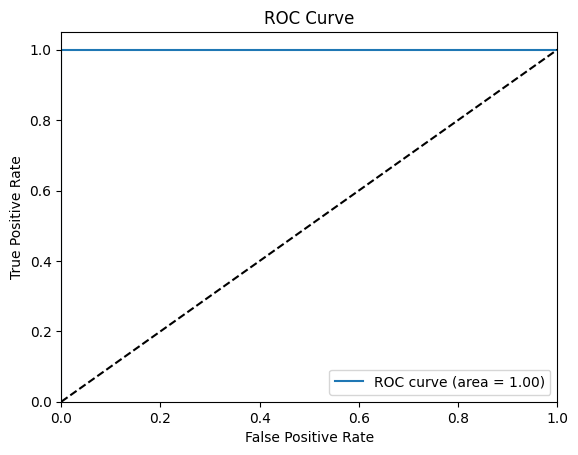

In [ ]:
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])

# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()